In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from utils.pandasUtils import save_dt, get_main_dt, get_dt, init_stat_dt, save_stat_dt
from fuzzywuzzy import fuzz, process

/Library/Python/3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
dt = get_main_dt()
dt_stat = init_stat_dt()

dt.head()

,surface,text_type,text
image,,,
paper-4,paper,printed,50.87\nТРЕБОВАНИЯ БЕЗОПАСНОСТИ\nЦЕМЕНТ СООТВЕТ...
paper-1,paper,printed,EWL\nПЕСКОБЕТОН\nM-300\n40 RU\nCOXAR CHEC)
paper-2,paper,printed,ecomaterial\nbasic\nEMENT®\nЦЕМЕНТ\nССПЦ 500-Д...
paper-3,paper,printed,НЕ БРОСАТЬ!\nПроизводитель / Manufacturor\nОЛО...
paper-5,paper,printed,Г КВАРЦЕВЫЙ ПЕСОК\nИРАНОРНАЯ КРОШКА\nПЛЕНКА\nС...


In [3]:
dt.groupby(['surface']).size()

surface
brick      28
glass      14
gold        7
metal      20
paper      12
plastic    14
silver     16
tyre       17
wood       22
dtype: int64

In [4]:
dt.groupby(['text_type']).size()

text_type
pressed        51
printed        55
squeezedout    44
dtype: int64

In [4]:
def find_max_levenstein(expected, actual):
    same_letters = {'А': 'A', 'а': 'a',
                    'В': 'B',
                    'Е': 'E', 'е': 'e',
                    'К': 'K', 'к': 'k',
                    'М': 'M',
                    'Н': 'H',
                    'О': 'O', 'о': 'o',
                    'Р': 'P', 'р': 'p',
                    'С': 'C', 'с': 'c',
                    'Т': 'T',
                    'У': 'Y', 'у': 'y',
                    'Х': 'X', 'х': 'x',
                    }
    for oldChar, newChar in same_letters.items():
        expected = expected.replace(oldChar, newChar)
        actual = actual.replace(oldChar, newChar)

    levenstein = fuzz.ratio(expected, actual)
    same_letters_2 = {'З': '3', 'з': '3',
                      'О': '0', 'о': '0',
                      'l': '1',
                    }
    for oldChar, newChar in same_letters_2.items():
        expected = expected.replace(oldChar, newChar)
        actual = actual.replace(oldChar, newChar)

    levenstein = max(levenstein, fuzz.ratio(expected, actual))
    return levenstein

In [5]:
def get_dt_(data_name):
    dt_ = get_dt(data_name)
    print(dt_.head(5))
    return dt_

def add_levenstein(dt_, data_name):
    dt_ = dt_.assign(levenstein=pd.Series(np.random.randn(len(dt_))).values)

    for image in dt_.index:
        if image in dt.index.values:
            expected = str(dt.text.loc[image])
            actual = dt_[data_name].loc[image]
            actual_str = '' if actual == np.nan else str(actual)

            dt_.loc[image] = actual, find_max_levenstein(expected.lower(), actual_str)

    print(dt_.head())
    return dt_

In [31]:
from statistics import median, mean

def stat(dt_, data_name):
    plt.hist(dt_.levenstein,
             bins=20,
             rwidth=0.4)
    plt.ylabel('Image')
    plt.xlabel('Levenstein')
    print(plt.show())

    values = sorted(dt_.levenstein)
    dt_stat.loc[data_name] = mean(values),median(values),min(values), max(values)

                                                    Unnamed: 0    image  \
easyocr                                                                   
50 кг 8т 'безопасности safety requirements треб...           0  paper-4   
nwi пескобеток [-з0б иихая сиви аокг                         1  paper-1   
ны ement ппромемеит 1p сспц 500-д20 ~ # |_= рас...           2  paper-2   
птомагад шапukulurn адотвск рассмg; баикортоста...           3  paper-3   
660 muk халевол ocп 3 e1 2500x1250x12 ty 5534-6...           4  wood-16   

                                                    levenstein  
easyocr                                                         
50 кг 8т 'безопасности safety requirements треб...    0.549260  
nwi пескобеток [-з0б иихая сиви аокг                 -0.034793  
ны ement ппромемеит 1p сспц 500-д20 ~ # |_= рас...   -1.456741  
птомагад шапukulurn адотвск рассмg; баикортоста...   -1.084165  
660 muk халевол ocп 3 e1 2500x1250x12 ty 5534-6...    2.643382  
                   

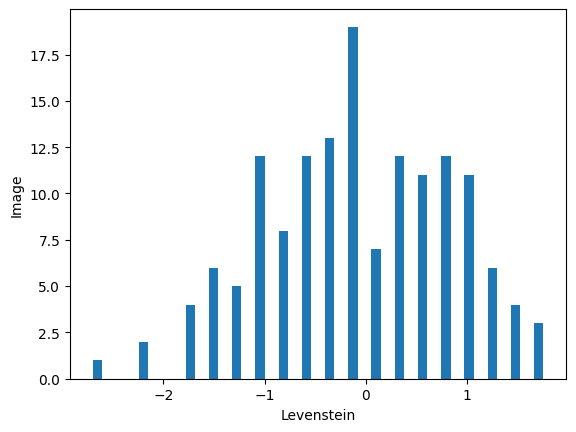

None


In [9]:
from utils.utils import easyocr_column_name

dt_easyocr = get_dt_(easyocr_column_name)
dt_easyocr = add_levenstein(dt_easyocr, easyocr_column_name)
stat(dt_easyocr, easyocr_column_name)
save_dt(dt_easyocr, easyocr_column_name)

                                                    Unnamed: 0    image  \
pytesseract                                                               
neckobetok\nlm\n\n                                           0  paper-1   
nw ement\n\necomaterial\ncct, 500-1120 basi¢\ny...           1  paper-2   
2, tokiheakay\nshkortostan, 4891\nteleak #73479...           2  paper-3   
tulatendho pasmewwats chkvyi                                 3  paper-4   
NaN                                                          4  paper-5   

                                                    levenstein  
pytesseract                                                     
neckobetok\nlm\n\n                                    2.275539  
nw ement\n\necomaterial\ncct, 500-1120 basi¢\ny...   -0.398075  
2, tokiheakay\nshkortostan, 4891\nteleak #73479...    0.183157  
tulatendho pasmewwats chkvyi                          0.020636  
NaN                                                  -0.174405  
                   

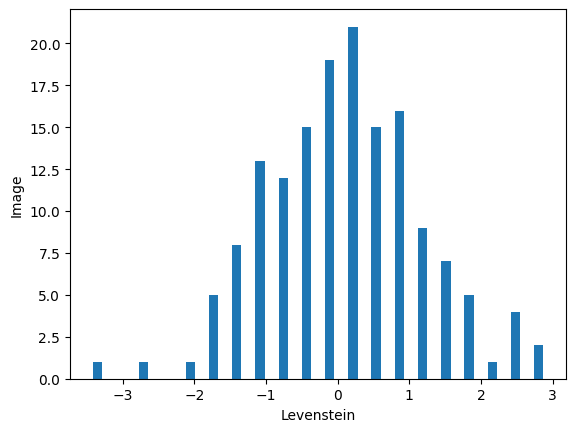

None


In [11]:
from utils.utils import pytesseract_column_name

dt_pytesseract = get_dt_(pytesseract_column_name)
dt_pytesseract = add_levenstein(dt_pytesseract, pytesseract_column_name)
stat(dt_pytesseract, pytesseract_column_name)
save_dt(dt_pytesseract, pytesseract_column_name)

                                                    Unnamed: 0    image  \
doctr                                                                     
50.81 safety requirements gost 31108-2016 and a...           0  paper-4   
nwl neckobetok m-300 cyxan chece ienentho-rscm ...           1  paper-1   
jement ebpomeewt ecomaterial basic tpyn ccn4500...           2  paper-2   
he spocatb! pomamopwren, - manufacturer oaohsck...           3  paper-3   
xotio,hbaa acoaibi "onmmkc" bcenoroahbi ot-20 a...           4  paper-5   

                                                    levenstein  
doctr                                                           
50.81 safety requirements gost 31108-2016 and a...    0.066398  
nwl neckobetok m-300 cyxan chece ienentho-rscm ...   -0.029078  
jement ebpomeewt ecomaterial basic tpyn ccn4500...   -1.083464  
he spocatb! pomamopwren, - manufacturer oaohsck...   -0.397192  
xotio,hbaa acoaibi "onmmkc" bcenoroahbi ot-20 a...   -0.642705  
                   

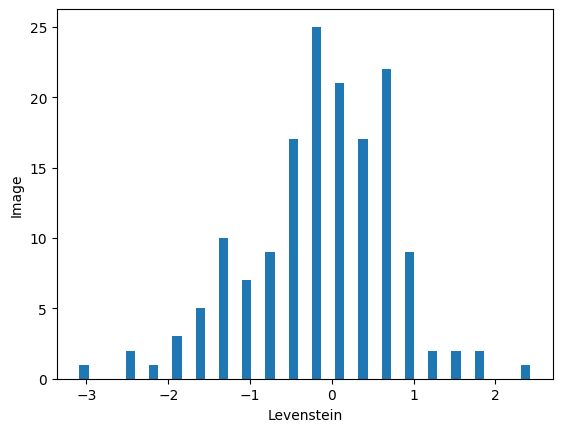

None


In [12]:
from utils.utils import doctr_column_name

dt_doctr = get_dt_(doctr_column_name)
dt_doctr = add_levenstein(dt_doctr, doctr_column_name)
stat(dt_doctr, doctr_column_name)
save_dt(dt_doctr, doctr_column_name)

In [13]:
save_stat_dt(dt_stat)
dt_stat

,mean,median,min,max
model,,,,
easyocr,-0.082269,-0.062480,-2.770543,1.828328
pytesseract,0.090897,0.110287,-3.515706,2.970180
doctr,-0.134896,-0.104648,-3.171105,2.511914
